In [2]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [3]:
table_desc = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

metadata_table = pd.read_csv(table_desc, sep="\t")

metadata_20x_filt = metadata_table.loc[(metadata_table.finalQC != "fail")
                              & (metadata_table.cov_chrA >= 20)
                              & (metadata_table.remove_as_relative != True)
                              & (metadata_table.remove_manual != True)
                              & (~metadata_table.ID.str.startswith("SAMEA11633"))
                             ]

In [4]:
female_IDs = metadata_20x_filt.loc[metadata_20x_filt.gSEX == "F"].ID

In [5]:
len(metadata_20x_filt.species_genotyping.unique())#.loc[sub_vasili.gSEX == "F"]

251

In [7]:
# Picking a macaque
for df_path in glob.glob('../results/window_stats_20x_inds/Macaca_nemestrina*_100kb_het_hom.txt'):
    print(df_path)
    output_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Macaca_nemestrina_ssp_100kb_het_hom.txt
['SAMN07503410' 'SAMN07508148' 'SAMN07508151' 'SAMN07508154'
 'SAMN02922335' 'SAMN02922336' 'SAMN02922338' 'SAMN02922339'
 'SAMN02922340' 'SAMN03121842' 'SAMN10499710' 'SAMN10499711'
 'SAMN10499712' 'SAMN10499713' 'SAMN10499714' 'SAMN10499715'
 'SAMN10499716' 'SAMN10499717' 'SAMN10499718' 'SAMN10499719'
 'SAMN10499720' 'SAMN10499721' 'SAMN18570964']


In [8]:
output_df.loc[output_df.GVCF_ID.isin(female_IDs)].groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID      chr_type            
SAMN02922335 aut       272.636628
             chrX      152.851690
SAMN02922336 aut       289.466276
             chrX      155.486233
SAMN02922338 aut       268.541245
             chrX      155.993742
SAMN02922339 aut       276.784174
             chrX      159.521277
SAMN02922340 aut       276.361777
             chrX      160.228411
SAMN03121842 aut         0.009843
             chrX        0.002503
SAMN07508148 aut       277.342403
             chrX      149.252190
SAMN07508151 aut       270.176972
             chrX      157.911139
SAMN10499711 aut       291.714613
             chrX      169.182103
SAMN10499712 aut       291.811140
             chrX      170.787234
SAMN10499714 aut       287.973000
             chrX      170.743429
SAMN10499715 aut       291.599439
             chrX      170.515019
SAMN10499716 aut       291.877929
             chrX      172.102003
SAMN10499717 aut       285.273326
             chrX      164.210889
SAMN10499718 aut       280.413940
             chrX      155.052566
SAMN10499719 aut       282.791557
             chrX      157.825407
SAMN10499720 aut       283.348364
             chrX      159.623905

In [9]:
output_df.loc[output_df.chr_type == "chrX"]

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
663343,62.0,0,859,SAMN07503410,0,NC_092145.1,100000,0.54278,chrX,Macaca_nemestrina_ssp
663344,66.0,0,590,SAMN07503410,100000,NC_092145.1,200000,0.96887,chrX,Macaca_nemestrina_ssp
663345,58.0,0,471,SAMN07503410,200000,NC_092145.1,300000,0.99113,chrX,Macaca_nemestrina_ssp
663346,76.0,0,492,SAMN07503410,300000,NC_092145.1,400000,0.98482,chrX,Macaca_nemestrina_ssp
663347,51.0,0,368,SAMN07503410,400000,NC_092145.1,500000,0.87417,chrX,Macaca_nemestrina_ssp
...,...,...,...,...,...,...,...,...,...,...
700092,78.0,0,614,SAMN18570964,159300000,NC_092145.1,159400000,0.14235,chrX,Macaca_nemestrina_ssp
700093,218.0,0,1626,SAMN18570964,159400000,NC_092145.1,159500000,0.33790,chrX,Macaca_nemestrina_ssp
700094,79.0,0,594,SAMN18570964,159500000,NC_092145.1,159600000,0.12113,chrX,Macaca_nemestrina_ssp
700095,50.0,0,373,SAMN18570964,159600000,NC_092145.1,159700000,0.09141,chrX,Macaca_nemestrina_ssp


[(0.0, 1.0),
 Text(0.5, 1.0, 'Nemestrina callablility per 100kb'),
 Text(0.5, 0, 'Callability')]

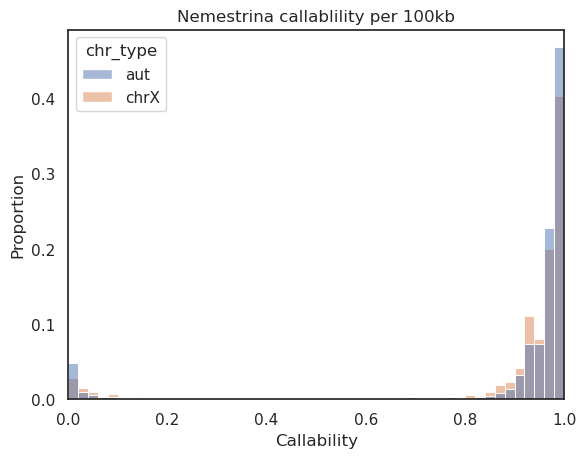

In [32]:
g = sns.histplot(output_df,
                 x="callable_frac", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(0, 1), title="Nemestrina callablility per 100kb", xlabel="Callability")

[(-1.0, 500.0),
 Text(0.5, 1.0, 'Raw heterozygosity per 100kb'),
 Text(0.5, 0, 'Heterozygosity')]

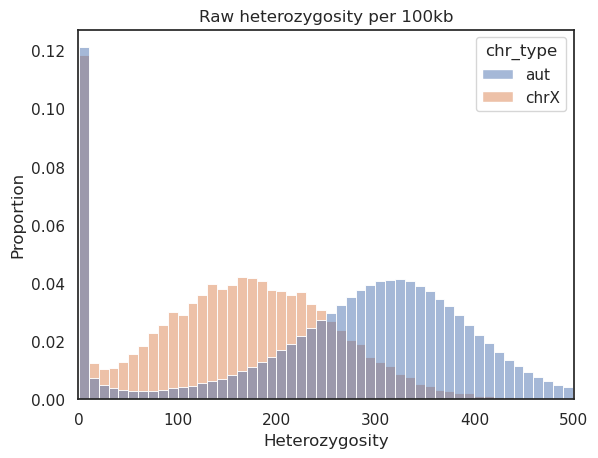

In [14]:
g = sns.histplot(output_df.loc[(output_df.het < 500)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 500), title="Raw heterozygosity per 100kb", xlabel="Heterozygosity")

In [15]:
output_df.loc[(output_df.chr_type == "chrX") & (output_df.callable_frac >= 0.75) & (output_df.window_start <= 10000000)].groupby(["window_start"])["het"].mean().reset_index(),

(    window_start         het
 0         100000   70.347826
 1         200000   54.782609
 2         300000   57.869565
 3         400000   41.652174
 4         600000   44.086957
 ..           ...         ...
 84       9600000  249.217391
 85       9700000  211.434783
 86       9800000  231.826087
 87       9900000  234.130435
 88      10000000  203.260870
 
 [89 rows x 2 columns],)

In [18]:
output_df.loc[(output_df.chr_type == "chrX") & (output_df.callable_frac >= 0.75)].groupby(["window_start"])["het"].mean().reset_index(),

(      window_start         het
 0           100000   70.347826
 1           200000   54.782609
 2           300000   57.869565
 3           400000   41.652174
 4           600000   44.086957
 ...            ...         ...
 1436     157600000  242.130435
 1437     157700000  224.608696
 1438     157800000  237.000000
 1439     157900000  290.826087
 1440     158000000  278.739130
 
 [1441 rows x 2 columns],)

<Axes: xlabel='window_start', ylabel='het'>

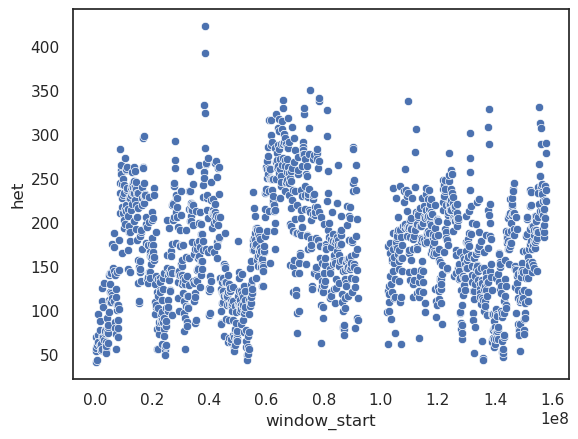

In [19]:
sns.scatterplot(output_df.loc[(output_df.chr_type == "chrX") & (output_df.callable_frac >= 0.75)].groupby(["window_start"])["het"].mean().reset_index(),
                x="window_start", y="het"
        )

In [20]:
output_df.loc[(output_df.chr_type == "chrX") & (output_df.callable_frac >= 0.75)
                              & (output_df.window_start <= 20000000)
                             & (output_df.window_start >= 1000000)].groupby(["window_start"])["het"].mean().reset_index()

,window_start,het
0,1000000,64.956522
1,1100000,64.695652
2,1500000,88.695652
3,1600000,61.391304
4,1800000,78.260870
...,...,...
176,19600000,176.000000
177,19700000,203.347826
178,19800000,162.478261
179,19900000,212.521739


In [22]:
# Picking a orang
for df_path in glob.glob('../results/window_stats_20x_inds/Pongo_pygmaeus_*_100kb_het_hom.txt'):
    print(df_path)
    pongo_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Pongo_pygmaeus_ssp_100kb_het_hom.txt
['SAMN07503410' 'SAMN07508148' 'SAMN07508151' 'SAMN07508154'
 'SAMN02922335' 'SAMN02922336' 'SAMN02922338' 'SAMN02922339'
 'SAMN02922340' 'SAMN03121842' 'SAMN10499710' 'SAMN10499711'
 'SAMN10499712' 'SAMN10499713' 'SAMN10499714' 'SAMN10499715'
 'SAMN10499716' 'SAMN10499717' 'SAMN10499718' 'SAMN10499719'
 'SAMN10499720' 'SAMN10499721' 'SAMN18570964']


In [23]:
pongo_df = pongo_df.loc[pongo_df.GVCF_ID.isin(female_IDs)]
pongo_df.groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID        chr_type            
PD_0262        aut       146.753853
               chrX       46.844720
SAMEA104361533 aut       143.430417
               chrX       51.189441
SAMEA104361535 aut       146.997642
               chrX       37.955901
SAMEA104361537 aut       146.638269
               chrX       51.934783
SAMEA104361540 aut       135.128139
               chrX       38.742236
SAMEA104361541 aut       152.705626
               chrX       50.269565
SAMN01920547   aut       143.905175
               chrX       57.893168
SAMN01920548   aut       153.700213
               chrX       56.997516
SAMN01920549   aut       138.199117
               chrX       48.519255
SAMN01920550   aut       149.636044
               chrX       49.789441

[(0.0, 1.0), Text(0.5, 1.0, 'Callablility per 100kb')]

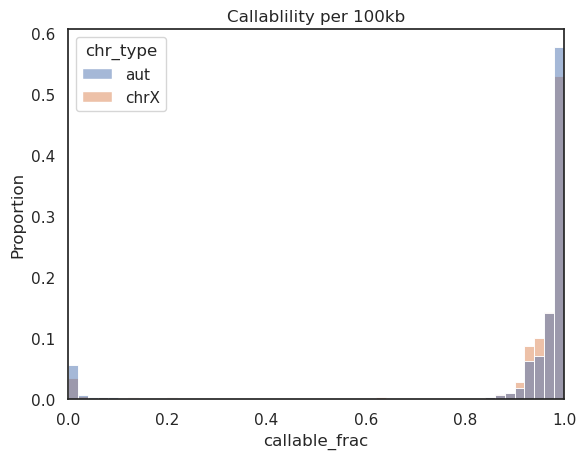

In [31]:
g = sns.histplot(pongo_df,
                 x="callable_frac", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(0, 1), title="Callablility per 100kb")

[(-1.0, 500.0), Text(0.5, 1.0, 'Raw heterozygosity per 100kb')]

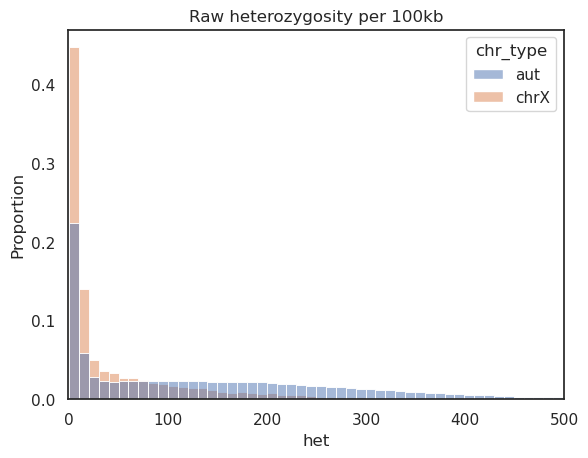

In [39]:
g = sns.histplot(pongo_df.loc[(pongo_df.het < 500)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 500), title="Raw heterozygosity per 100kb")

In [28]:
# Picking a Alouatta
for df_path in glob.glob('../results/window_stats_20x_inds/Alouatta_palliata*_100kb_het_hom.txt'):
    print(df_path)
    aloutta_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Alouatta_palliata_ssp_100kb_het_hom.txt
['SAMN07503410' 'SAMN07508148' 'SAMN07508151' 'SAMN07508154'
 'SAMN02922335' 'SAMN02922336' 'SAMN02922338' 'SAMN02922339'
 'SAMN02922340' 'SAMN03121842' 'SAMN10499710' 'SAMN10499711'
 'SAMN10499712' 'SAMN10499713' 'SAMN10499714' 'SAMN10499715'
 'SAMN10499716' 'SAMN10499717' 'SAMN10499718' 'SAMN10499719'
 'SAMN10499720' 'SAMN10499721' 'SAMN18570964']


In [29]:
aloutta_df = aloutta_df.loc[aloutta_df.GVCF_ID.isin(female_IDs)]
aloutta_df.groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID chr_type           
PD_0175 aut       38.280296
        chrX      22.750182

[(0.0, 1.0),
 Text(0.5, 1.0, 'Callablility per 10kb'),
 Text(0.5, 0, 'Callability')]

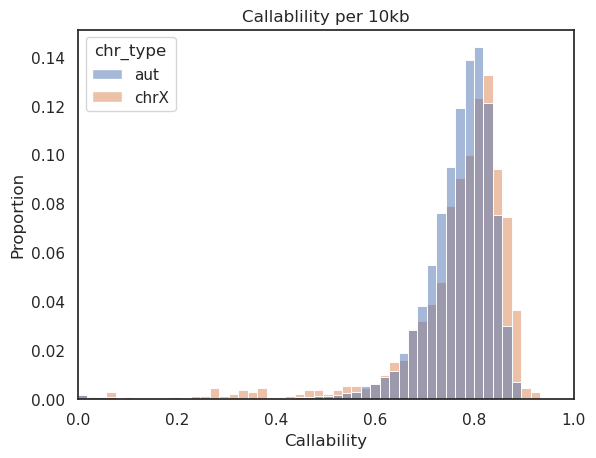

In [30]:
g = sns.histplot(aloutta_df.loc[(aloutta_df.het < 100)],
                 x="callable_frac", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(0, 1), title="Callablility per 10kb", xlabel="Callability")

[(-1.0, 100.0),
 Text(0.5, 1.0, 'Raw heterozygosity per 100kb'),
 Text(0.5, 0, 'Heterozygosity')]

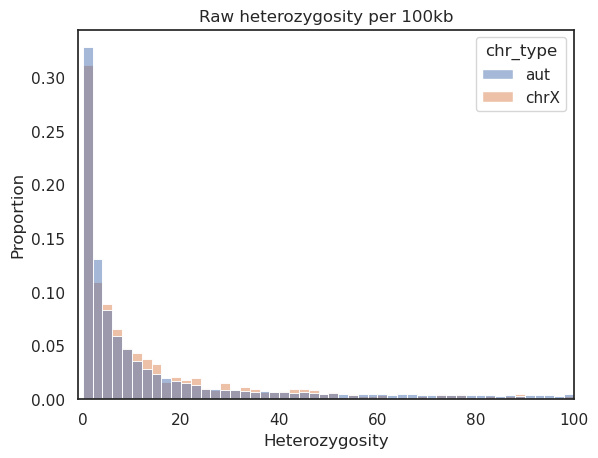

In [37]:
g = sns.histplot(aloutta_df.loc[(aloutta_df.het <= 100)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 100), title="Raw heterozygosity per 100kb", xlabel="Heterozygosity")

[(-1.0, 20.0),
 Text(0.5, 1.0, 'Filtered heterozygosity per 10kb'),
 Text(0.5, 0, 'Heterozygosity')]

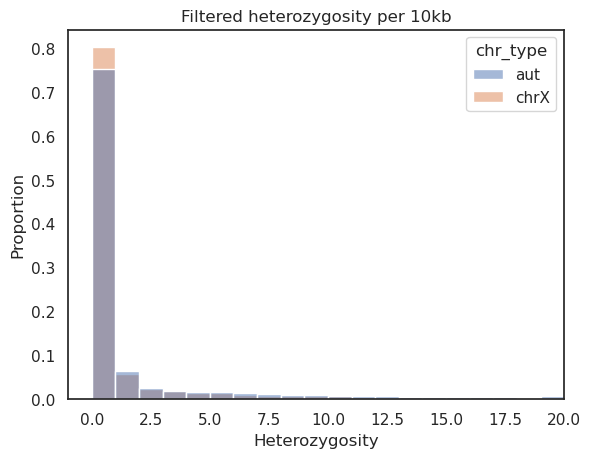

In [58]:
g = sns.histplot(aloutta_df.loc[(aloutta_df.het <= 20) & (aloutta_df.callable_frac > 0.75)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=20)
g.set(xlim=(-1, 20), title="Filtered heterozygosity per 10kb", xlabel="Heterozygosity")